## Questions


### 1- Which player has the highest price on the market?

### 2- How many players are over 30 years old?

### 3- How many players have height >= 1.8?

### 4- What is the average height and age of players in the league?

### 5- Which nationality has the most players in the league?

### 6- What is the average contract expiration year for players in the league?

### 7- How many players have joined their club within the last year?

### 8- What is the most common position in the league?

### 9- Which club has the most expensive players on average?

### 10- What is the distribution of footedness (left-footed, right-footed, or both feet) among players in the league?

### 11- Which outfitter is the most common among players in the league?

### 12- How many players contract expires in 2022?

### 13- How many players were signed by their current club in 2020?

### 14- What is the average price of players in the top 3 most expensive clubs in the dataset?

### 15- Which countries do the players come from?

### 16- Which league have the highest percentage of players from diffrent countries?

### 17- Are there any correlation between height and age?

### 18- How does the age of players differ by position?

### 19- Visualize the top 10 nationalities with the highest average player prices using a bar chart.

### 20- Visualize a boxplot of the price.

### 21- What is the age distribution of players?

### 22- How does the age vary by league?

### 23- How do players compare to other in terms of (age , height , position)?

### 24- How does players price vary by height and age?

### 25- Is there a correlation between age, height, max_price with the price.

### 26- Show the counts of obseravtions in the position.

### 27- Show the counts of observations in the league.

### 28- Show the counts of observations in the foot (left - right - both).

### 29- Show the counts of observations in the outfitter.

### 30- Create a lineplot of player age, price with league.

In [290]:
!pip install datasist

In [291]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix, \
    precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from  datasist.structdata import detect_outliers
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr
from datetime import datetime,timedelta

In [292]:
data = pd.read_csv("top5_leagues_player.csv")

In [293]:
data

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
0,0,Ederson,NaN,29,1.88,Brazil Portugal,Osasco (SP),45.00,70.00,Goalkeeper,31,left,Man City,2026-06-30,2017-07-01,Gestifute,Puma,EPL
1,1,Stefan Ortega,Stefan Ortega Moreno,30,1.85,Germany Spain,Hofgeismar,6.00,6.00,Goalkeeper,18,right,Man City,2025-06-30,2022-07-01,neblung ...,NaN,EPL
2,2,Scott Carson,Scott Paul Carson,37,1.88,England,Whitehaven,0.25,6.00,Goalkeeper,33,right,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL
3,3,Rúben Dias,Rúben Santos Gato Alves Dias,26,1.87,Portugal,Amadora,75.00,75.00,Defender - Centre-Back,3,right,Man City,2027-06-30,2020-09-29,Gestifute,Nike,EPL
4,4,Nathan Aké,Nathan Benjamin Aké,28,1.80,Netherlands Cote d'Ivoire,Den Haag,35.00,40.00,Defender - Centre-Back,6,left,Man City,2025-06-30,2020-08-05,Wasserman,Nike,EPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,2607,Moussa Djitté,Moussa Kalilou Djitté,23,1.80,Senegal,Diattouma,2.00,2.00,Attack - Centre-Forward,28,right,AC Ajaccio,2023-06-30,2023-01-31,FS Management,NaN,Other
2608,2608,Mounaïm El Idrissy,منعم الإدريسي,24,1.81,France Morocco,Martigues,1.80,1.80,Attack - Centre-Forward,7,right,AC Ajaccio,2023-06-30,2019-07-01,N.Agency,NaN,Other
2609,2609,Moussa Soumano,NaN,17,NaN,France Mali,NaN,0.90,0.90,Attack - Centre-Forward,34,NaN,AC Ajaccio,2026-06-30,2023-01-01,NaN,NaN,Other
2610,2610,Romain Hamouma,NaN,36,1.79,France Algeria,Montbéliard,0.60,7.00,Attack - Centre-Forward,17,right,AC Ajaccio,2023-06-30,2022-07-01,Gallea Gestion S.A,NaN,Other


In [294]:
data.head()

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
0,0,Ederson,NaN,29,1.88,Brazil Portugal,Osasco (SP),45.00,70.0,Goalkeeper,31,left,Man City,2026-06-30,2017-07-01,Gestifute,Puma,EPL
1,1,Stefan Ortega,Stefan Ortega Moreno,30,1.85,Germany Spain,Hofgeismar,6.00,6.0,Goalkeeper,18,right,Man City,2025-06-30,2022-07-01,neblung ...,NaN,EPL
2,2,Scott Carson,Scott Paul Carson,37,1.88,England,Whitehaven,0.25,6.0,Goalkeeper,33,right,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL
3,3,Rúben Dias,Rúben Santos Gato Alves Dias,26,1.87,Portugal,Amadora,75.00,75.0,Defender - Centre-Back,3,right,Man City,2027-06-30,2020-09-29,Gestifute,Nike,EPL
4,4,Nathan Aké,Nathan Benjamin Aké,28,1.80,Netherlands Cote d'Ivoire,Den Haag,35.00,40.0,Defender - Centre-Back,6,left,Man City,2025-06-30,2020-08-05,Wasserman,Nike,EPL


In [295]:
data.tail()

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
2607,2607,Moussa Djitté,Moussa Kalilou Djitté,23,1.80,Senegal,Diattouma,2.0,2.00,Attack - Centre-Forward,28,right,AC Ajaccio,2023-06-30,2023-01-31,FS Management,NaN,Other
2608,2608,Mounaïm El Idrissy,منعم الإدريسي,24,1.81,France Morocco,Martigues,1.8,1.80,Attack - Centre-Forward,7,right,AC Ajaccio,2023-06-30,2019-07-01,N.Agency,NaN,Other
2609,2609,Moussa Soumano,NaN,17,NaN,France Mali,NaN,0.9,0.90,Attack - Centre-Forward,34,NaN,AC Ajaccio,2026-06-30,2023-01-01,NaN,NaN,Other
2610,2610,Romain Hamouma,NaN,36,1.79,France Algeria,Montbéliard,0.6,7.00,Attack - Centre-Forward,17,right,AC Ajaccio,2023-06-30,2022-07-01,Gallea Gestion S.A,NaN,Other
2611,2611,Yoann Touzghar,NaN,36,1.80,Tunisia France,Avignon,0.5,1.75,Attack - Centre-Forward,9,right,AC Ajaccio,2024-06-30,2022-08-24,AGJ SP MGMT,NaN,Other


In [296]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2612 entries, 0 to 2611
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2612 non-null   int64  
 1   name              2612 non-null   object 
 2   full_name         1480 non-null   object 
 3   age               2612 non-null   int64  
 4   height            2601 non-null   float64
 5   nationality       2612 non-null   object 
 6   place_of_birth    2595 non-null   object 
 7   price             2602 non-null   float64
 8   max_price         2606 non-null   float64
 9   position          2612 non-null   object 
 10  shirt_nr          2612 non-null   int64  
 11  foot              2576 non-null   object 
 12  club              2612 non-null   object 
 13  contract_expires  2544 non-null   object 
 14  joined_club       2612 non-null   object 
 15  player_agent      2353 non-null   object 
 16  outfitter         1003 non-null   object 


In [297]:
data.describe()

,Unnamed: 0,age,height,price,max_price,shirt_nr
count,2612.000000,2612.000000,2601.000000,2602.000000,2606.000000,2612.000000
mean,1305.500000,26.305513,1.830892,10.650711,17.304729,20.495789
std,754.163775,4.645297,0.067255,15.773271,21.948577,17.914206
min,0.000000,17.000000,1.630000,0.025000,0.025000,1.000000
25%,652.750000,23.000000,1.780000,1.800000,3.500000,8.000000
50%,1305.500000,26.000000,1.830000,4.500000,10.000000,17.000000
75%,1958.250000,30.000000,1.880000,13.000000,22.000000,27.000000
max,2611.000000,42.000000,2.060000,180.000000,200.000000,99.000000


In [298]:
data = data.drop(['shirt_nr' , 'full_name' , 'Unnamed: 0','place_of_birth'] , axis = 1)

In [299]:
data

,name,age,height,nationality,price,max_price,position,foot,club,contract_expires,joined_club,player_agent,outfitter,league
0,Ederson,29,1.88,Brazil Portugal,45.00,70.00,Goalkeeper,left,Man City,2026-06-30,2017-07-01,Gestifute,Puma,EPL
1,Stefan Ortega,30,1.85,Germany Spain,6.00,6.00,Goalkeeper,right,Man City,2025-06-30,2022-07-01,neblung ...,NaN,EPL
2,Scott Carson,37,1.88,England,0.25,6.00,Goalkeeper,right,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL
3,Rúben Dias,26,1.87,Portugal,75.00,75.00,Defender - Centre-Back,right,Man City,2027-06-30,2020-09-29,Gestifute,Nike,EPL
4,Nathan Aké,28,1.80,Netherlands Cote d'Ivoire,35.00,40.00,Defender - Centre-Back,left,Man City,2025-06-30,2020-08-05,Wasserman,Nike,EPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,Moussa Djitté,23,1.80,Senegal,2.00,2.00,Attack - Centre-Forward,right,AC Ajaccio,2023-06-30,2023-01-31,FS Management,NaN,Other
2608,Mounaïm El Idrissy,24,1.81,France Morocco,1.80,1.80,Attack - Centre-Forward,right,AC Ajaccio,2023-06-30,2019-07-01,N.Agency,NaN,Other
2609,Moussa Soumano,17,NaN,France Mali,0.90,0.90,Attack - Centre-Forward,NaN,AC Ajaccio,2026-06-30,2023-01-01,NaN,NaN,Other
2610,Romain Hamouma,36,1.79,France Algeria,0.60,7.00,Attack - Centre-Forward,right,AC Ajaccio,2023-06-30,2022-07-01,Gallea Gestion S.A,NaN,Other


In [300]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2612 entries, 0 to 2611
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2612 non-null   object 
 1   age               2612 non-null   int64  
 2   height            2601 non-null   float64
 3   nationality       2612 non-null   object 
 4   price             2602 non-null   float64
 5   max_price         2606 non-null   float64
 6   position          2612 non-null   object 
 7   foot              2576 non-null   object 
 8   club              2612 non-null   object 
 9   contract_expires  2544 non-null   object 
 10  joined_club       2612 non-null   object 
 11  player_agent      2353 non-null   object 
 12  outfitter         1003 non-null   object 
 13  league            2612 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 285.8+ KB


In [301]:
data.isnull().sum()

name                   0
age                    0
height                11
nationality            0
price                 10
max_price              6
position               0
foot                  36
club                   0
contract_expires      68
joined_club            0
player_agent         259
outfitter           1609
league                 0
dtype: int64

In [302]:
imputer = SimpleImputer(strategy= 'most_frequent')
data['player_agent']=imputer.fit_transform(data[['player_agent']])
data['contract_expires'] =imputer.fit_transform(data[['contract_expires']])
data['foot'] =imputer.fit_transform(data[['foot']])
data['outfitter'] =imputer.fit_transform(data[['outfitter']])
data['height']=imputer.fit_transform(data[['height']])
data['price']=imputer.fit_transform(data[['price']])
data['max_price']=imputer.fit_transform(data[['max_price']])

In [303]:
data

,name,age,height,nationality,price,max_price,position,foot,club,contract_expires,joined_club,player_agent,outfitter,league
0,Ederson,29,1.88,Brazil Portugal,45.00,70.00,Goalkeeper,left,Man City,2026-06-30,2017-07-01,Gestifute,Puma,EPL
1,Stefan Ortega,30,1.85,Germany Spain,6.00,6.00,Goalkeeper,right,Man City,2025-06-30,2022-07-01,neblung ...,Nike,EPL
2,Scott Carson,37,1.88,England,0.25,6.00,Goalkeeper,right,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL
3,Rúben Dias,26,1.87,Portugal,75.00,75.00,Defender - Centre-Back,right,Man City,2027-06-30,2020-09-29,Gestifute,Nike,EPL
4,Nathan Aké,28,1.80,Netherlands Cote d'Ivoire,35.00,40.00,Defender - Centre-Back,left,Man City,2025-06-30,2020-08-05,Wasserman,Nike,EPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,Moussa Djitté,23,1.80,Senegal,2.00,2.00,Attack - Centre-Forward,right,AC Ajaccio,2023-06-30,2023-01-31,FS Management,Nike,Other
2608,Mounaïm El Idrissy,24,1.81,France Morocco,1.80,1.80,Attack - Centre-Forward,right,AC Ajaccio,2023-06-30,2019-07-01,N.Agency,Nike,Other
2609,Moussa Soumano,17,1.85,France Mali,0.90,0.90,Attack - Centre-Forward,right,AC Ajaccio,2026-06-30,2023-01-01,Wasserman,Nike,Other
2610,Romain Hamouma,36,1.79,France Algeria,0.60,7.00,Attack - Centre-Forward,right,AC Ajaccio,2023-06-30,2022-07-01,Gallea Gestion S.A,Nike,Other


In [304]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2612 entries, 0 to 2611
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2612 non-null   object 
 1   age               2612 non-null   int64  
 2   height            2612 non-null   float64
 3   nationality       2612 non-null   object 
 4   price             2612 non-null   float64
 5   max_price         2612 non-null   float64
 6   position          2612 non-null   object 
 7   foot              2612 non-null   object 
 8   club              2612 non-null   object 
 9   contract_expires  2612 non-null   object 
 10  joined_club       2612 non-null   object 
 11  player_agent      2612 non-null   object 
 12  outfitter         2612 non-null   object 
 13  league            2612 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 285.8+ KB


In [305]:
data.isnull().sum()

name                0
age                 0
height              0
nationality         0
price               0
max_price           0
position            0
foot                0
club                0
contract_expires    0
joined_club         0
player_agent        0
outfitter           0
league              0
dtype: int64

In [306]:
outliers=detect_outliers(data,0,['max_price','price','height'])
outliers

[0,
 3,
 5,
 6,
 10,
 12,
 13,
 15,
 16,
 17,
 19,
 20,
 21,
 22,
 23,
 25,
 28,
 30,
 33,
 34,
 36,
 38,
 39,
 45,
 46,
 47,
 48,
 49,
 51,
 52,
 55,
 58,
 59,
 64,
 66,
 67,
 69,
 70,
 73,
 75,
 77,
 79,
 82,
 88,
 90,
 92,
 94,
 95,
 97,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 112,
 113,
 114,
 123,
 125,
 127,
 128,
 131,
 132,
 133,
 136,
 138,
 139,
 145,
 147,
 148,
 155,
 160,
 161,
 162,
 164,
 165,
 181,
 192,
 204,
 231,
 234,
 237,
 247,
 261,
 277,
 292,
 293,
 334,
 383,
 432,
 456,
 477,
 501,
 537,
 538,
 539,
 540,
 542,
 547,
 548,
 550,
 553,
 554,
 555,
 556,
 557,
 565,
 566,
 580,
 582,
 584,
 599,
 612,
 616,
 617,
 639,
 642,
 644,
 669,
 673,
 1052,
 1062,
 1065,
 1068,
 1073,
 1079,
 1084,
 1089,
 1098,
 1108,
 1109,
 1110,
 1119,
 1121,
 1129,
 1130,
 1139,
 1145,
 1146,
 1152,
 1154,
 1156,
 1199,
 1207,
 1208,
 1213,
 1224,
 1225,
 1235,
 1261,
 1337,
 1465,
 1603,
 1606,
 1607,
 1608,
 1611,
 1612,
 1615,
 1616,
 1617,
 1618,
 1620,
 1621,
 1622,
 1623,

In [350]:
out=data.loc[outliers]
clean=data.drop(outliers,axis=0)
clean

,name,age,height,nationality,price,max_price,position,foot,club,contract_expires,joined_club,player_agent,outfitter,league,contract_expires_year,years_in_club,price_ratio
1,Stefan Ortega,30,1.85,Germany Spain,6.00,6.00,Goalkeeper,2,Man City,2025-06-30,2022-07-01,neblung ...,Nike,EPL,2025,1,1.000000
2,Scott Carson,37,1.88,England,0.25,6.00,Goalkeeper,2,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL,2023,2,0.041667
8,Sergio Gómez,22,1.71,Spain,15.00,15.00,Defender - Left-Back,1,Man City,2026-06-30,2022-08-16,SEG,Nike,EPL,2026,1,1.000000
9,Benjamin Mendy,28,1.85,France Senegal,3.00,45.00,Defender - Left-Back,1,Man City,2023-06-30,2017-07-24,Sport Cover,adidas,EPL,2023,6,0.066667
11,Rico Lewis,18,1.69,England,15.00,15.00,Defender - Right-Back,2,Man City,2024-06-30,2022-07-01,CAA Base Ltd,Nike,EPL,2024,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,Moussa Djitté,23,1.80,Senegal,2.00,2.00,Attack - Centre-Forward,2,AC Ajaccio,2023-06-30,2023-01-31,FS Management,Nike,Other,2023,0,1.000000
2608,Mounaïm El Idrissy,24,1.81,France Morocco,1.80,1.80,Attack - Centre-Forward,2,AC Ajaccio,2023-06-30,2019-07-01,N.Agency,Nike,Other,2023,4,1.000000
2609,Moussa Soumano,17,1.85,France Mali,0.90,0.90,Attack - Centre-Forward,2,AC Ajaccio,2026-06-30,2023-01-01,Wasserman,Nike,Other,2026,0,1.000000
2610,Romain Hamouma,36,1.79,France Algeria,0.60,7.00,Attack - Centre-Forward,2,AC Ajaccio,2023-06-30,2022-07-01,Gallea Gestion S.A,Nike,Other,2023,1,0.085714


In [308]:
data

,name,age,height,nationality,price,max_price,position,foot,club,contract_expires,joined_club,player_agent,outfitter,league
0,Ederson,29,1.88,Brazil Portugal,45.00,70.00,Goalkeeper,left,Man City,2026-06-30,2017-07-01,Gestifute,Puma,EPL
1,Stefan Ortega,30,1.85,Germany Spain,6.00,6.00,Goalkeeper,right,Man City,2025-06-30,2022-07-01,neblung ...,Nike,EPL
2,Scott Carson,37,1.88,England,0.25,6.00,Goalkeeper,right,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL
3,Rúben Dias,26,1.87,Portugal,75.00,75.00,Defender - Centre-Back,right,Man City,2027-06-30,2020-09-29,Gestifute,Nike,EPL
4,Nathan Aké,28,1.80,Netherlands Cote d'Ivoire,35.00,40.00,Defender - Centre-Back,left,Man City,2025-06-30,2020-08-05,Wasserman,Nike,EPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,Moussa Djitté,23,1.80,Senegal,2.00,2.00,Attack - Centre-Forward,right,AC Ajaccio,2023-06-30,2023-01-31,FS Management,Nike,Other
2608,Mounaïm El Idrissy,24,1.81,France Morocco,1.80,1.80,Attack - Centre-Forward,right,AC Ajaccio,2023-06-30,2019-07-01,N.Agency,Nike,Other
2609,Moussa Soumano,17,1.85,France Mali,0.90,0.90,Attack - Centre-Forward,right,AC Ajaccio,2026-06-30,2023-01-01,Wasserman,Nike,Other
2610,Romain Hamouma,36,1.79,France Algeria,0.60,7.00,Attack - Centre-Forward,right,AC Ajaccio,2023-06-30,2022-07-01,Gallea Gestion S.A,Nike,Other


In [361]:
lenc = LabelEncoder()
data['foot'] = lenc.fit_transform(data['foot'])
data['position'] = lenc.fit_transform(data['position'])
data['contract_expires_year'] = pd.to_datetime(data['contract_expires']).dt.year

data['years_in_club'] = pd.to_datetime(data['joined_club']).dt.year - pd.to_datetime('today').year
data['years_in_club'] = data['years_in_club'].abs()

data['price_ratio'] = data['price'] / data['max_price']

data.head()

,name,age,height,nationality,price,max_price,position,foot,club,contract_expires,joined_club,player_agent,outfitter,league,contract_expires_year,years_in_club,price_ratio
0,Ederson,29,1.88,Brazil Portugal,45.00,70.0,7,1,Man City,2026-06-30,2017-07-01,Gestifute,Puma,EPL,2026,6,0.642857
1,Stefan Ortega,30,1.85,Germany Spain,6.00,6.0,7,2,Man City,2025-06-30,2022-07-01,neblung ...,Nike,EPL,2025,1,1.000000
2,Scott Carson,37,1.88,England,0.25,6.0,7,2,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL,2023,2,0.041667
3,Rúben Dias,26,1.87,Portugal,75.00,75.0,4,2,Man City,2027-06-30,2020-09-29,Gestifute,Nike,EPL,2027,3,1.000000
4,Nathan Aké,28,1.80,Netherlands Cote d'Ivoire,35.00,40.0,4,1,Man City,2025-06-30,2020-08-05,Wasserman,Nike,EPL,2025,3,0.875000


In [362]:
data.corr()

,age,height,price,max_price,position,foot,contract_expires_year,years_in_club,price_ratio
age,1.000000,0.048387,-0.120856,0.127409,-0.009403,0.045661,-0.359891,0.374879,-0.679502
height,0.048387,1.000000,-0.057553,-0.086624,-0.058021,0.050232,-0.005992,-0.027504,0.002943
price,-0.120856,-0.057553,1.000000,0.817545,-0.048169,-0.003262,0.301643,0.099134,0.224770
max_price,0.127409,-0.086624,0.817545,1.000000,-0.073353,-0.010779,0.132791,0.196662,-0.164650
position,-0.009403,-0.058021,-0.048169,-0.073353,1.000000,0.057782,-0.046028,0.060772,0.032912
foot,0.045661,0.050232,-0.003262,-0.010779,0.057782,1.000000,-0.018165,0.017504,-0.029358
contract_expires_year,-0.359891,-0.005992,0.301643,0.132791,-0.046028,-0.018165,1.000000,-0.154504,0.399157
years_in_club,0.374879,-0.027504,0.099134,0.196662,0.060772,0.017504,-0.154504,1.000000,-0.234164
price_ratio,-0.679502,0.002943,0.224770,-0.164650,0.032912,-0.029358,0.399157,-0.234164,1.000000


In [363]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2612 entries, 0 to 2611
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   2612 non-null   object        
 1   age                    2612 non-null   int64         
 2   height                 2612 non-null   float64       
 3   nationality            2612 non-null   object        
 4   price                  2612 non-null   float64       
 5   max_price              2612 non-null   float64       
 6   position               2612 non-null   int32         
 7   foot                   2612 non-null   int64         
 8   club                   2612 non-null   object        
 9   contract_expires       2612 non-null   datetime64[ns]
 10  joined_club            2612 non-null   datetime64[ns]
 11  player_agent           2612 non-null   object        
 12  outfitter              2612 non-null   object        
 13  lea

# 1- Which player has the highest price on the market?

In [364]:
data_sorted = data.sort_values('price',ascending=False)

In [365]:
highest_price = data_sorted.iloc[0]['name']
print("The player is: ",highest_price)

The player is:  Kylian Mbappé


# 2- How many players are over 30 years old?

In [366]:
players_over_30_years = data[data['age'] > 30]
players_over_30_years

,name,age,height,nationality,price,max_price,position,foot,club,contract_expires,joined_club,player_agent,outfitter,league,contract_expires_year,years_in_club,price_ratio
2,Scott Carson,37,1.88,England,0.25,6.00,7,2,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL,2023,2,0.041667
10,Kyle Walker,32,1.83,England,15.00,50.00,6,2,Man City,2024-06-30,2017-07-14,CAA Base Ltd,Puma,EPL,2024,6,0.300000
15,Ilkay Gündogan,32,1.80,Germany,25.00,50.00,10,2,Man City,2023-06-30,2016-07-01,KIN Partners,adidas,EPL,2023,7,0.500000
16,Kevin De Bruyne,31,1.81,Belgium,80.00,150.00,9,2,Man City,2025-06-30,2015-08-30,Wasserman,Nike,EPL,2025,8,0.533333
21,Riyad Mahrez,32,1.79,Algeria France,30.00,60.00,2,1,Man City,2025-06-30,2018-07-10,Wasserman,Nike,EPL,2025,5,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,Michaël Barreto,32,1.75,France Portugal,0.50,1.00,9,2,AC Ajaccio,2023-06-30,2020-07-01,Alliance Soccer ...,Nike,Other,2023,3,0.500000
2601,Youcef Belaïli,31,1.82,Algeria,1.80,3.00,1,2,AC Ajaccio,2023-06-30,2022-10-12,ROGON,Nike,Other,2023,1,0.600000
2605,Riad Nouri,37,1.78,France Algeria,0.25,0.70,2,2,AC Ajaccio,2024-06-30,2020-09-07,Just 4 player Group,Nike,Other,2024,3,0.357143
2610,Romain Hamouma,36,1.79,France Algeria,0.60,7.00,0,2,AC Ajaccio,2023-06-30,2022-07-01,Gallea Gestion S.A,Nike,Other,2023,1,0.085714


# 3- How many players have height >= 1.8?

In [367]:
players_height = data[data['height'] >= 1.8]
players_height

,name,age,height,nationality,price,max_price,position,foot,club,contract_expires,joined_club,player_agent,outfitter,league,contract_expires_year,years_in_club,price_ratio
0,Ederson,29,1.88,Brazil Portugal,45.00,70.00,7,1,Man City,2026-06-30,2017-07-01,Gestifute,Puma,EPL,2026,6,0.642857
1,Stefan Ortega,30,1.85,Germany Spain,6.00,6.00,7,2,Man City,2025-06-30,2022-07-01,neblung ...,Nike,EPL,2025,1,1.000000
2,Scott Carson,37,1.88,England,0.25,6.00,7,2,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL,2023,2,0.041667
3,Rúben Dias,26,1.87,Portugal,75.00,75.00,4,2,Man City,2027-06-30,2020-09-29,Gestifute,Nike,EPL,2027,3,1.000000
4,Nathan Aké,28,1.80,Netherlands Cote d'Ivoire,35.00,40.00,4,1,Man City,2025-06-30,2020-08-05,Wasserman,Nike,EPL,2025,3,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,Cyrille Bayala,26,1.81,Burkina Faso,1.00,1.00,2,2,AC Ajaccio,2024-06-30,2021-01-15,SVF FOOT,Nike,Other,2024,2,1.000000
2607,Moussa Djitté,23,1.80,Senegal,2.00,2.00,0,2,AC Ajaccio,2023-06-30,2023-01-31,FS Management,Nike,Other,2023,0,1.000000
2608,Mounaïm El Idrissy,24,1.81,France Morocco,1.80,1.80,0,2,AC Ajaccio,2023-06-30,2019-07-01,N.Agency,Nike,Other,2023,4,1.000000
2609,Moussa Soumano,17,1.85,France Mali,0.90,0.90,0,2,AC Ajaccio,2026-06-30,2023-01-01,Wasserman,Nike,Other,2026,0,1.000000


# 4- What is the average height and age of players in the league?

In [368]:
average_height = data['height'].mean()
average_age = data['age'].mean()
print("The average height is: ",average_height)
print("The average age is: ",average_age)

The average height is:  1.8309724349157734
The average age is:  26.305513016845328


# 5- Which nationality has the most players in the league?

In [369]:
nationality_counts = data['nationality'].value_counts() #count the number of players for each nationality

In [370]:
most_players_nationality = nationality_counts.index[0]
print("Nationality with the most players: ",most_players_nationality)
print("Number of players: ",nationality_counts[most_players_nationality])

Nationality with the most players:  Spain
Number of players:  311


# 6- What is the average contract expiration year for players in the league?

In [371]:
data['contract_expires'] = pd.to_datetime(data['contract_expires'])
average_con_exp = data['contract_expires'].dt.year.mean()
print("The average contract expiration year for players in the league is: ",average_con_exp)

The average contract expiration year for players in the league is:  2024.738897396631


# 7- How many players have joined their club within the last year?

In [372]:
data['joined_club'] = pd.to_datetime(data['joined_club'])
last_year = datetime.today() - timedelta(days=365)
recently_joined = data[data['joined_club'] > last_year]
number_recently_joined = recently_joined.shape[0]
print("There are ",number_recently_joined," players joined their club within the last year")

There are  1146  players joined their club within the last year


# 8- What is the most common position in the league?

In [373]:
pos_counts = data['position'].value_counts()
most_common_pos = pos_counts.idxmax()
print("The most common position in the league is: ",most_common_pos)

The most common position in the league is:  4


# 9- Which club has the most expensive players on average?

In [374]:
average_price_by_club = data.groupby('club')['price'].mean()
most_expensive_club = average_price_by_club.idxmax()
print("The club with the most expensive players on average is: ",most_expensive_club)

The club with the most expensive players on average is:  Man City


# 10- What is the distribution of footedness (left-footed, right-footed, or both feet) among players in the league?

In [375]:
footedness_distribution = data['foot'].value_counts(normalize=True)
print(footedness_distribution)

2    0.707121
1    0.254977
0    0.037902
Name: foot, dtype: float64


# 11- Which outfitter is the most common among players in the league?

In [376]:
outfit_counts = data['outfitter'].value_counts()
most_common_outfitter = outfit_counts.idxmax()
print("The most common outfitter among players in the league is: ",most_common_outfitter)

The most common outfitter among players in the league is:  Nike


# 12 - How many players contract expires in 2022?

In [377]:
data['contract_expires'] = pd.to_datetime(data['contract_expires'])

# Filter players whose contracts expire in 2022
players_2022 = data[data['contract_expires'].dt.year == 2022]

# Count the number of players
num_players_2022 = len(players_2022)

print("Number of players whose contracts expire in 2022:", num_players_2022)

Number of players whose contracts expire in 2022: 0


# 13- How many players were signed by their current club in 2020?

In [378]:
data['joined_club'] = pd.to_datetime(data['joined_club'])

signed_players_2020 = data[data['joined_club'].dt.year == 2020]

num_signed_players_2020 = len(signed_players_2020)

print("The number of players who were signed by their current club in 2020 is:", num_signed_players_2020)

The number of players who were signed by their current club in 2020 is: 303


# 14- What is the average price of players in the top 3 most expensive clubs in the dataset?

In [379]:
top_3_clubs = data.groupby("club")["price"].max().nlargest(3).index.tolist()

average_price_top_clubs = data[data["club"].isin(top_3_clubs)]["price"].mean()

print("Average price of players in the top 3 clubs is: ", average_price_top_clubs)

Average price of players in the top 3 clubs is:  31.78782051282051


# 15- Which countries do the players come from?

In [380]:
unique_countries = data['nationality'].unique()

# Print the countries
print("Countries from which the players come:")
for country in unique_countries:
    print(country)

Countries from which the players come:
Brazil  Portugal
Germany  Spain
England
Portugal
Netherlands  Cote d'Ivoire
Spain  France
Switzerland  Nigeria
Spain
France  Senegal
England  Jamaica
Argentina  Spain
Germany
Belgium
England  Ireland
Algeria  France
Norway
Argentina
Senegal  Guinea-Bissau
United States  Poland
England  Italy
France  Cote d'Ivoire
France  DR Congo
Senegal  France
England  Sierra Leone
Brazil  France
France  Mali
Switzerland  DR Congo
Croatia
England  Guyana
England  Nigeria
Ukraine
United States  Croatia
Morocco  Netherlands
Albania  England
Cote d'Ivoire
Gabon  France
United States  Lithuania
France  Cameroon
Brazil
Poland
Scotland  Isle of Man
Japan
Ghana
Italy  Brazil
Egypt
Switzerland
Brazil  Italy
England  Ghana
Ireland
Netherlands  Suriname
England  The Gambia
Cameroon  Germany
Scotland
Greece
Spain  Serbia
Spain  Brazil
Guinea
Portugal  England
Colombia
Netherlands  Togo
Uruguay
France  Martinique
Sweden
England  Angola
Netherlands  Curacao
England  DR Congo

# 16- Which league have the highest percentage of players from diffrent countries?

In [381]:
league_percentage = data.groupby('league')['nationality'].nunique() / data.groupby('league')['nationality'].count() * 100

# Find the league with the highest percentage
max_percentage_league = league_percentage.idxmax()
max_percentage = league_percentage.loc[max_percentage_league]

print("League with the highest percentage of players from different countries:")
print("League:", max_percentage_league)
print("Percentage:", max_percentage)

League with the highest percentage of players from different countries:
League: EPL
Percentage: 36.97104677060133


# 17- Are there any correlation between height and age?

In [382]:
correlation, p_value = pearsonr(data['height'], data['age'])

print("Correlation coefficient between height and age:", correlation)
print("P-value:", p_value)

Correlation coefficient between height and age: 0.048386683170091364
P-value: 0.013390976343064756


# 18- How does the age of players differ by position?

In [383]:
age_by_pos = data.groupby('position')['age'].mean()
print(age_by_pos)

position
0     26.641975
1     25.271605
2     25.732026
3     27.125000
4     26.446581
5     25.952153
6     26.313043
7     28.130159
8     20.000000
9     24.815476
10    25.728097
11    26.231156
12    26.750000
13    27.300000
Name: age, dtype: float64


# Data Visualization

# 19- Visualize the top 10 nationalities with the highest average player prices using a bar chart.

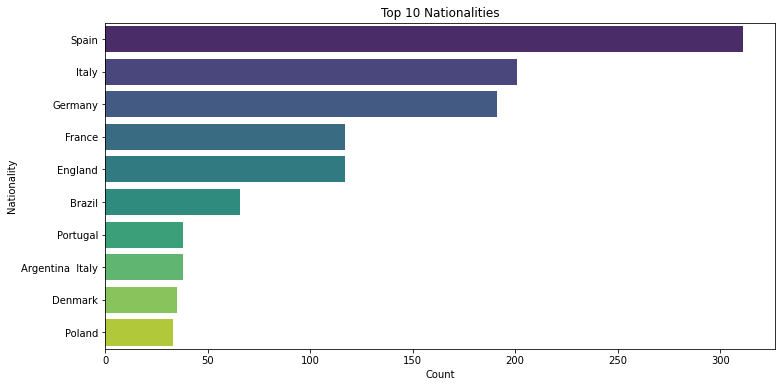

In [384]:
plt.figure(figsize=(12,6))
sns.countplot(y='nationality', data=data, order=data['nationality'].value_counts().iloc[:10].index, palette='viridis')
plt.title('Top 10 Nationalities')
plt.xlabel('Count')
plt.ylabel('Nationality')
plt.show()

# 20- Visualize a boxplot of the price.

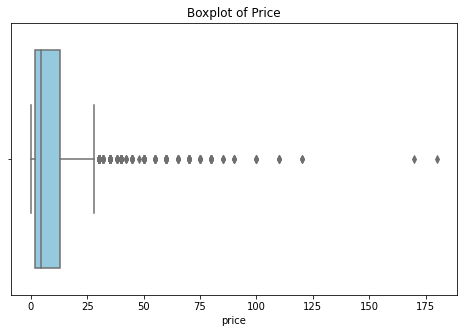

In [385]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data['price'], color='skyblue')
plt.title('Boxplot of Price')
plt.show()

# 21- What is the age distribution of players?

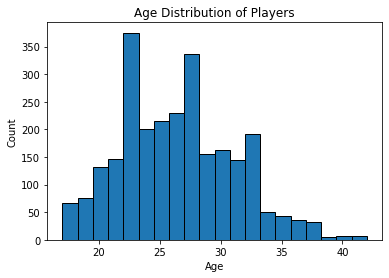

In [386]:
plt.hist(data['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Players')
plt.show()

# 22- How does the age vary by league ?

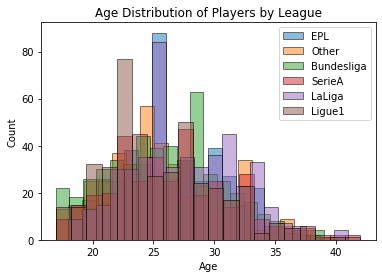

In [387]:
leagues = data['league'].unique()

for league in leagues:
    league_data = data[data['league'] == league]
    plt.hist(league_data['age'], bins=20, edgecolor='black', alpha=0.5, label=league)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Players by League')
plt.legend()
plt.show()

# 23- How do players compare to other in terms of (age , height , position)?

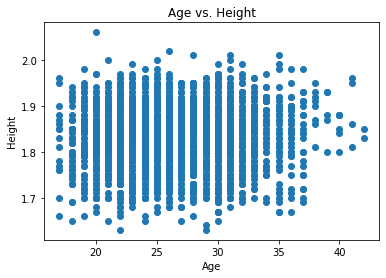

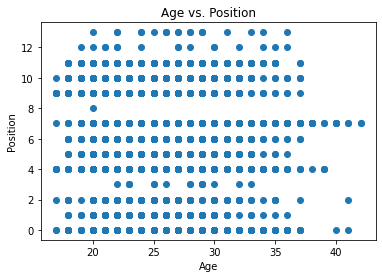

In [388]:
plt.scatter(data['age'], data['height'])
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Age vs. Height')
plt.show()

# Scatter plot: Age vs. Position
plt.scatter(data['age'], data['position'])
plt.xlabel('Age')
plt.ylabel('Position')
plt.title('Age vs. Position')
plt.show()

# 24- How does players price vary by height and age ? 

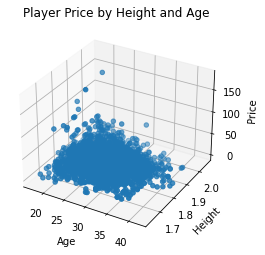

In [389]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['age'], data['height'], data['price'])
ax.set_xlabel('Age')
ax.set_ylabel('Height')
ax.set_zlabel('Price')
ax.set_title('Player Price by Height and Age')
plt.show()

# 25- Is there a correlation between age, height, max_price with the price.

In [390]:
data.corr()

,age,height,price,max_price,position,foot,contract_expires_year,years_in_club,price_ratio
age,1.000000,0.048387,-0.120856,0.127409,-0.009403,0.045661,-0.359891,0.374879,-0.679502
height,0.048387,1.000000,-0.057553,-0.086624,-0.058021,0.050232,-0.005992,-0.027504,0.002943
price,-0.120856,-0.057553,1.000000,0.817545,-0.048169,-0.003262,0.301643,0.099134,0.224770
max_price,0.127409,-0.086624,0.817545,1.000000,-0.073353,-0.010779,0.132791,0.196662,-0.164650
position,-0.009403,-0.058021,-0.048169,-0.073353,1.000000,0.057782,-0.046028,0.060772,0.032912
foot,0.045661,0.050232,-0.003262,-0.010779,0.057782,1.000000,-0.018165,0.017504,-0.029358
contract_expires_year,-0.359891,-0.005992,0.301643,0.132791,-0.046028,-0.018165,1.000000,-0.154504,0.399157
years_in_club,0.374879,-0.027504,0.099134,0.196662,0.060772,0.017504,-0.154504,1.000000,-0.234164
price_ratio,-0.679502,0.002943,0.224770,-0.164650,0.032912,-0.029358,0.399157,-0.234164,1.000000


<AxesSubplot:>

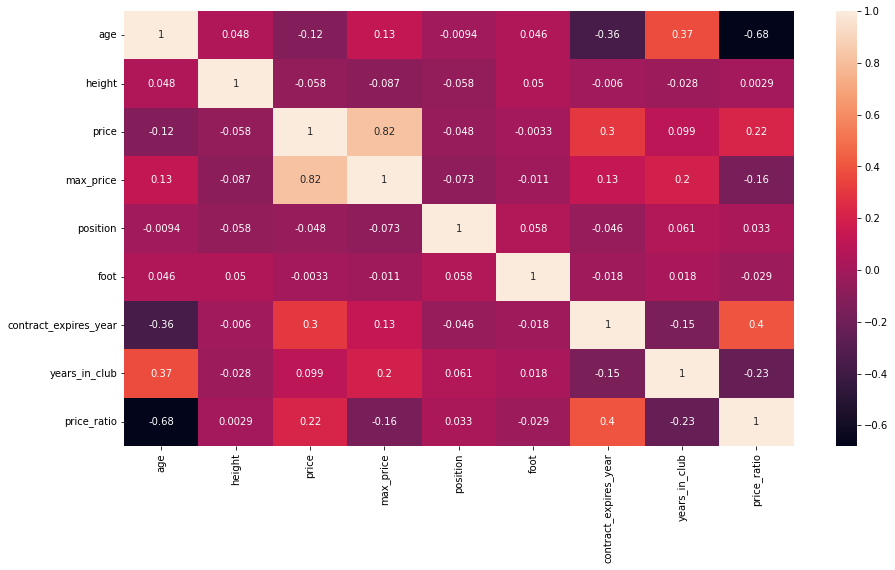

In [391]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

# 26- Show the counts of observations in the position.

<AxesSubplot:xlabel='position', ylabel='count'>

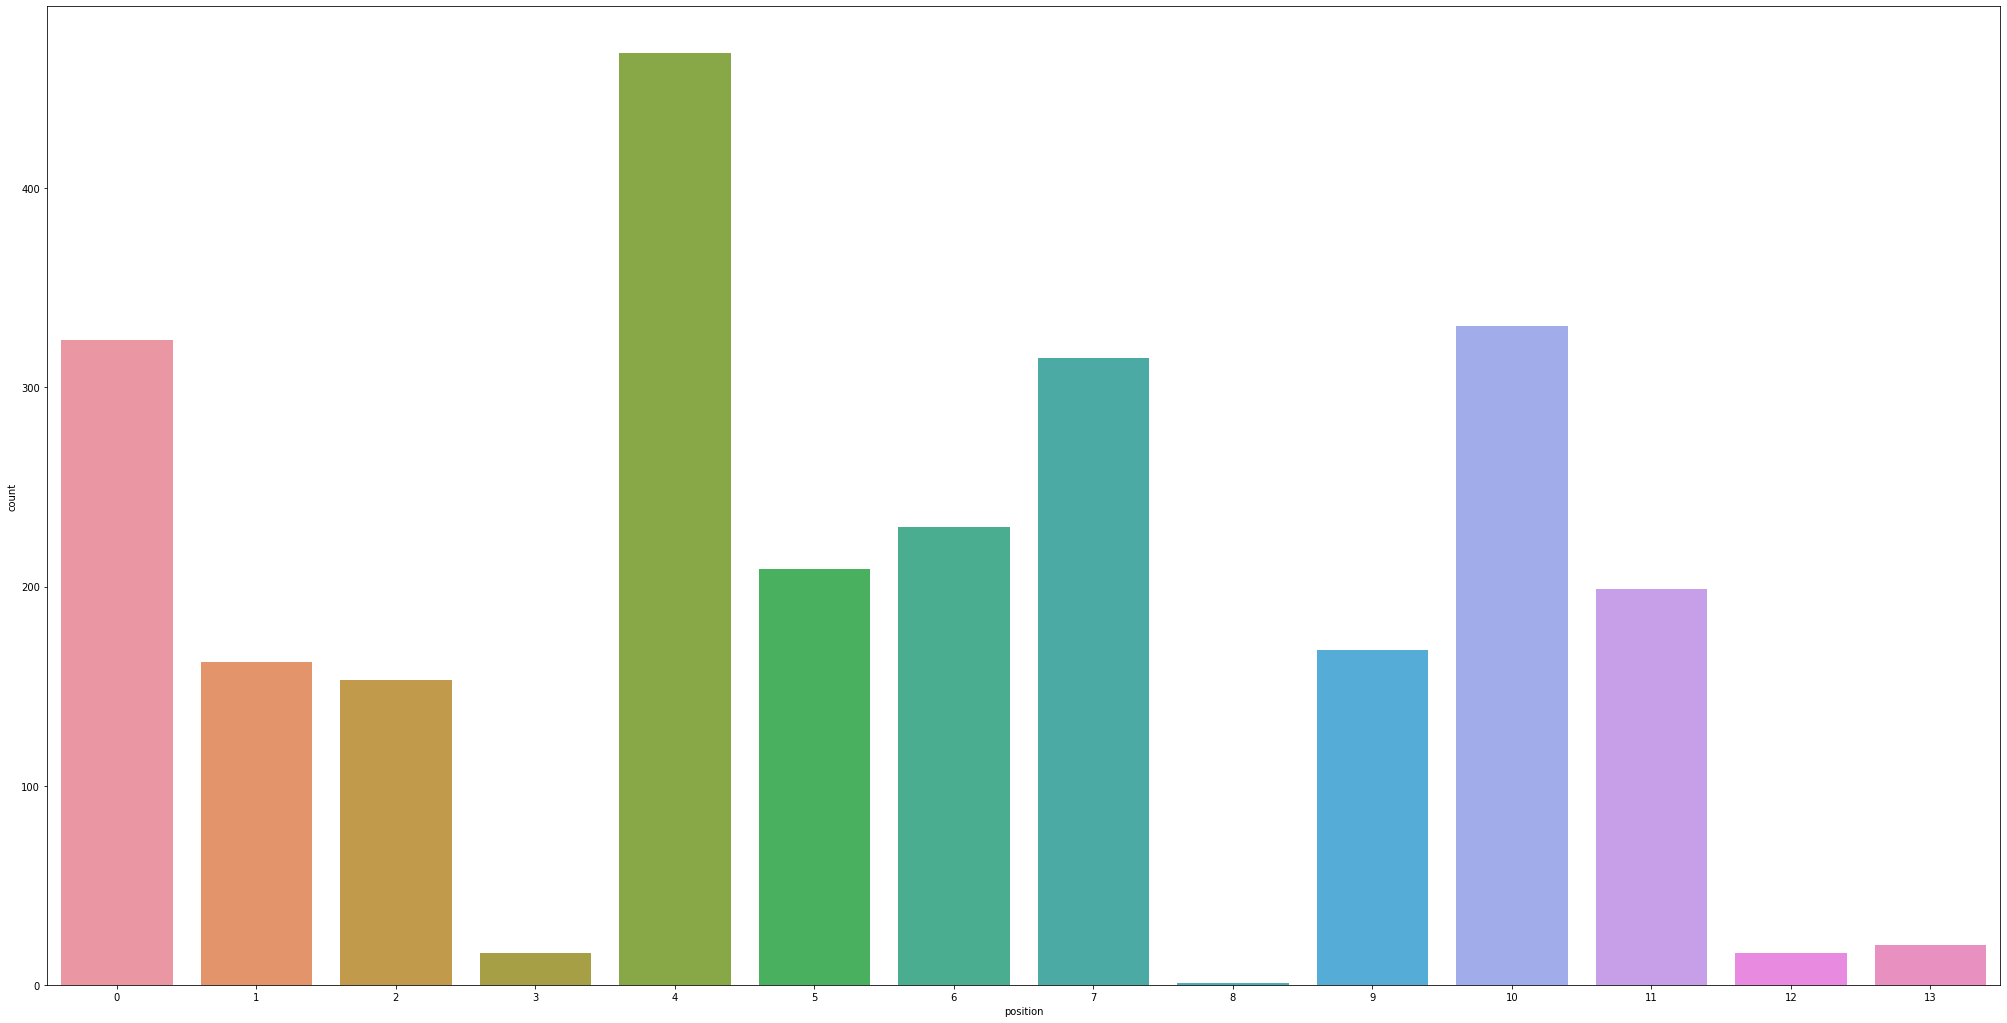

In [392]:
plt.figure(figsize=(35,18))
sns.countplot(x = 'position' , data = data)

# 27- Show the counts of observations in the league.

<AxesSubplot:xlabel='league', ylabel='count'>

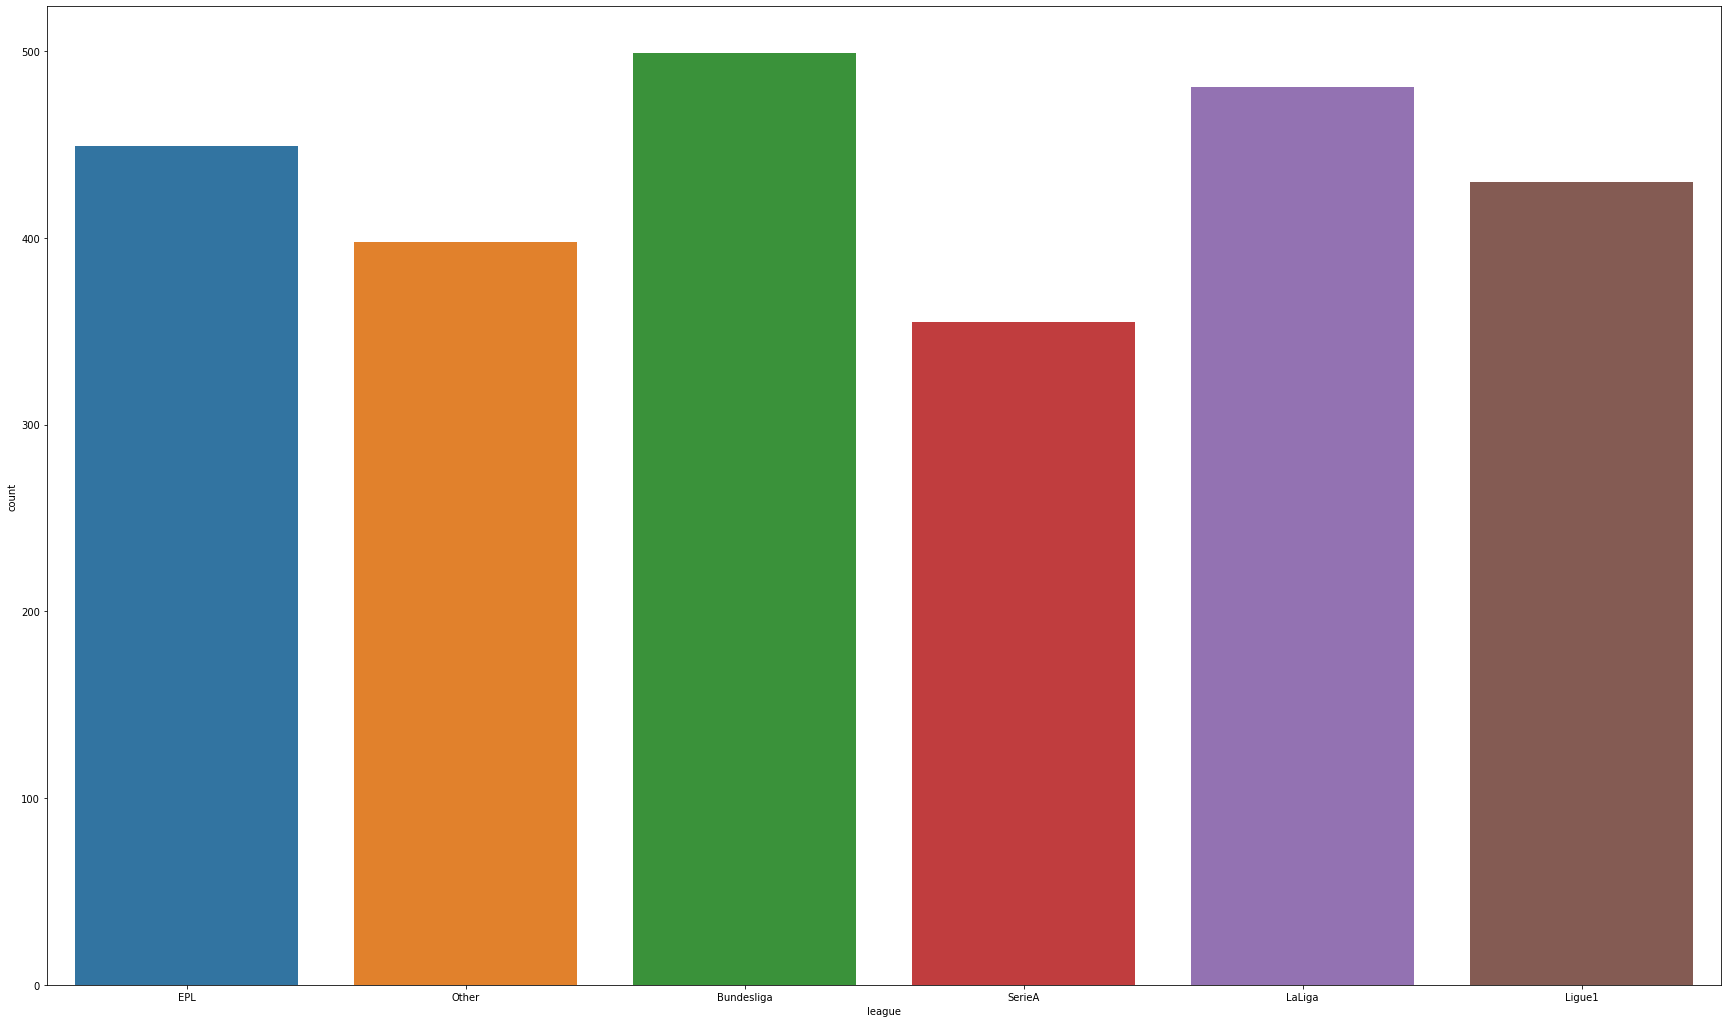

In [393]:
plt.figure(figsize=(30,18))
sns.countplot(x = 'league' , data=data)

# 28- Show the counts of observations in the foot (left - right - both).

<AxesSubplot:xlabel='foot', ylabel='count'>

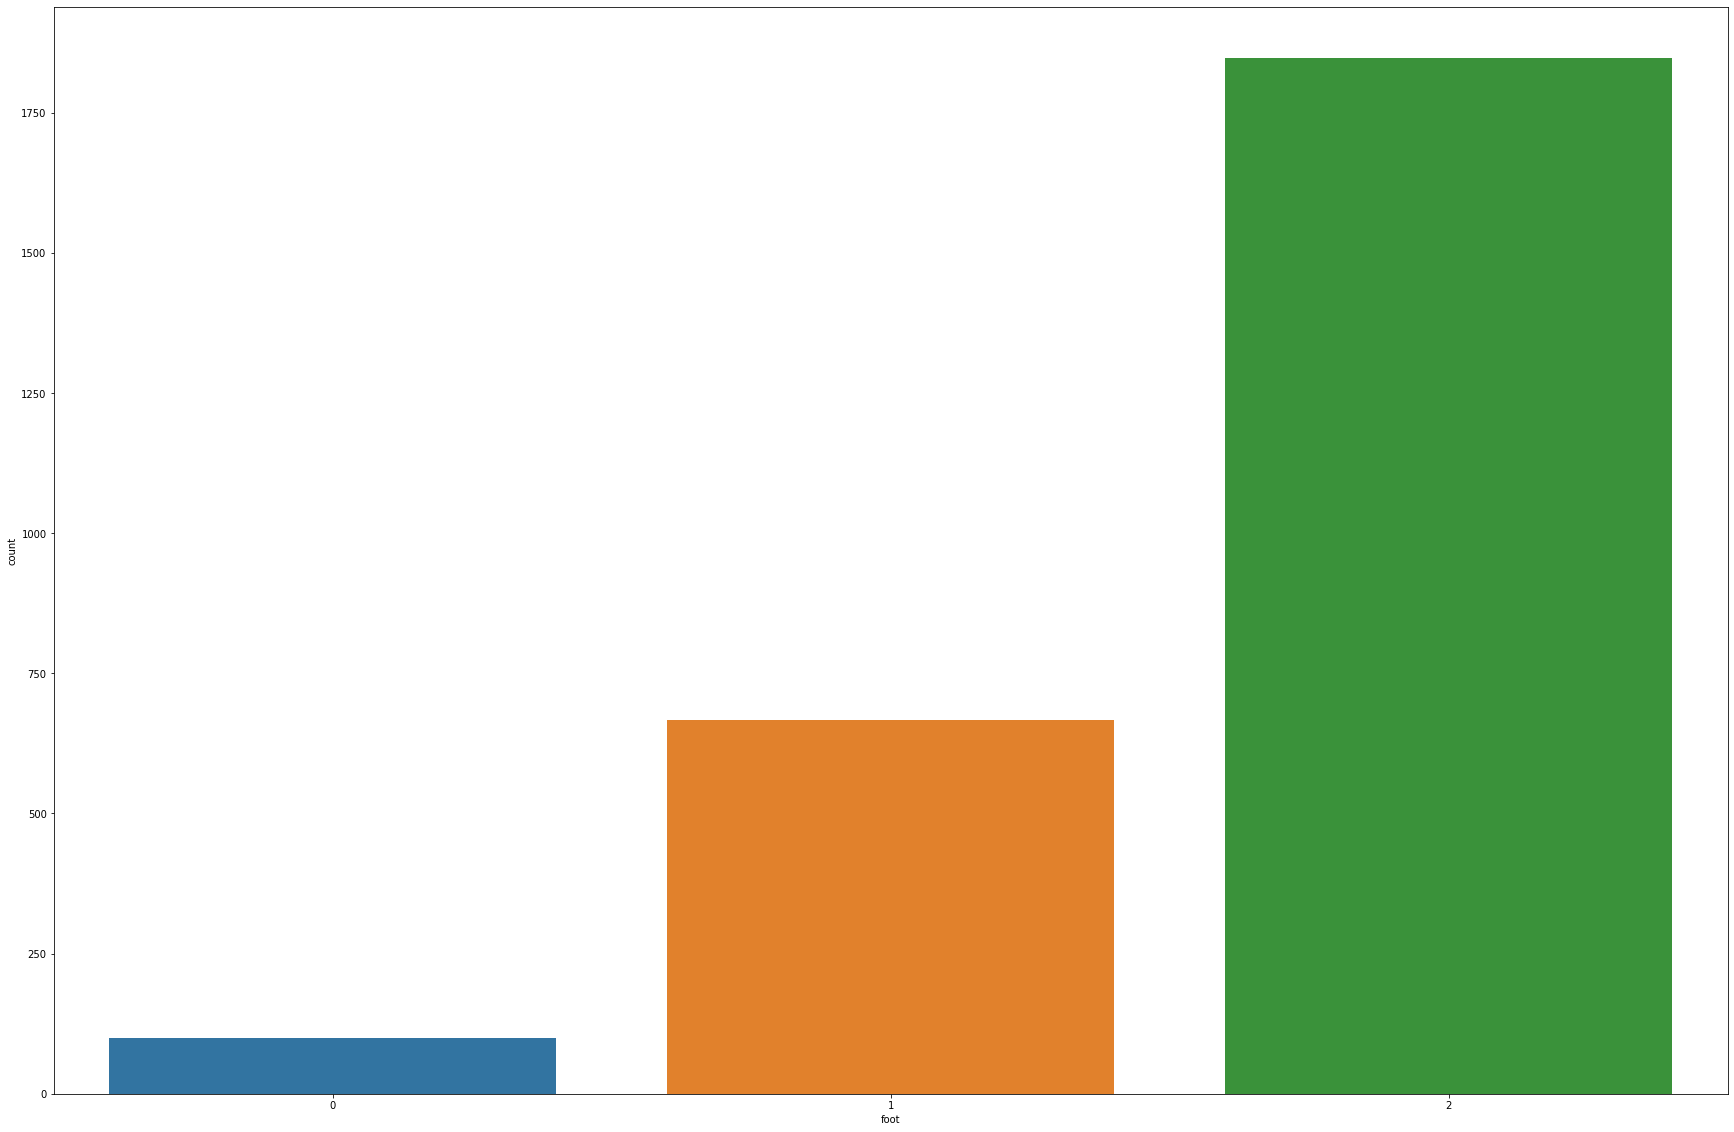

In [394]:
plt.figure(figsize=(30,20))
sns.countplot(x = 'foot' , data=data)

# 29- Show the counts of observations in the outfitter.

<AxesSubplot:xlabel='outfitter', ylabel='count'>

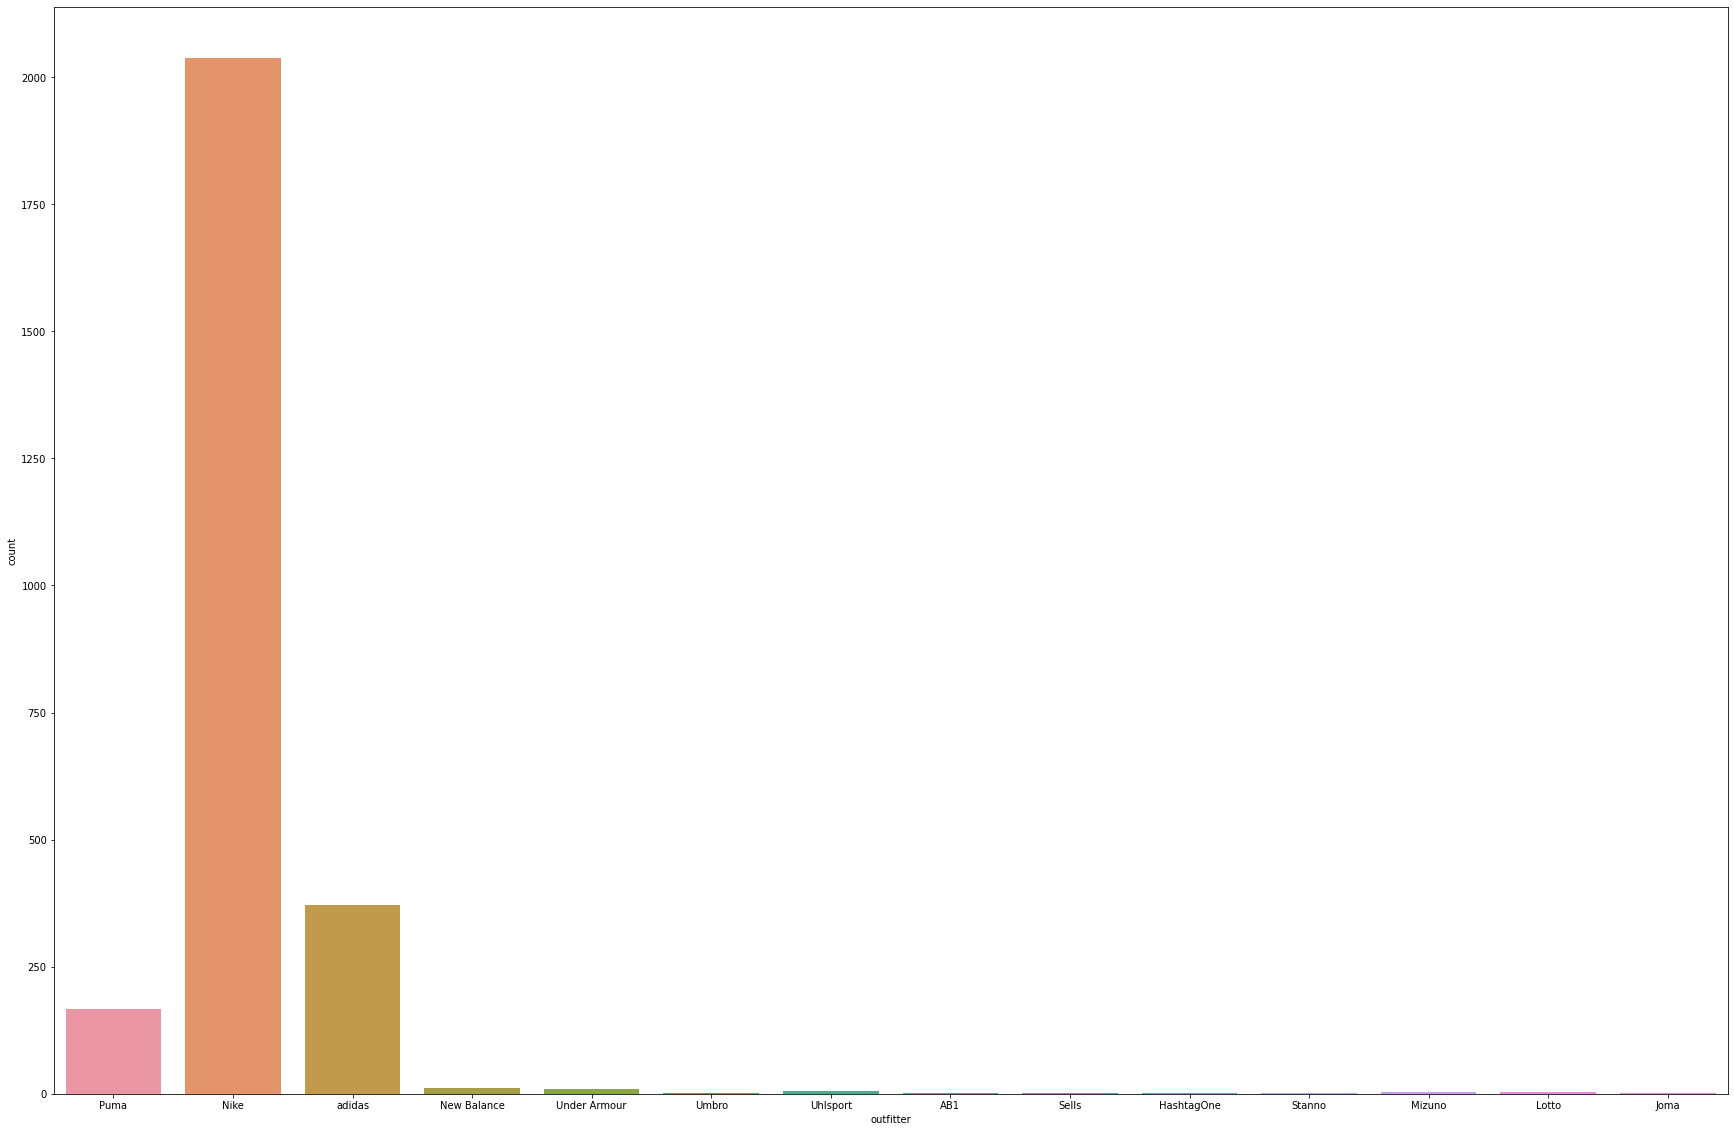

In [395]:
plt.figure(figsize=(30,20))
sns.countplot(x = 'outfitter' , data=data)

# 30- Create a lineplot of player age, price with league.

<AxesSubplot:xlabel='league', ylabel='price'>

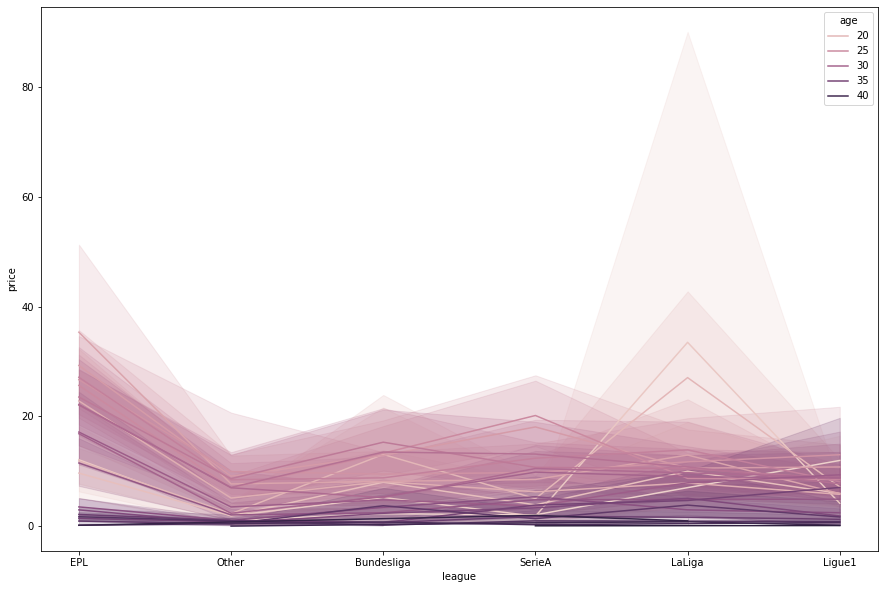

In [396]:
plt.figure(figsize=(15,10))
sns.lineplot(x='league',y='price',hue='age',data=data)

# Data Modeling

In [416]:
# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

# Define the input matrix X and the output vector y for the training set
X_train = train_data[['max_price','contract_expires_year','position','age','height']]
y_train = train_data['price']

# Define the input matrix X and the output vector y for the testing set
X_test = test_data[['max_price','contract_expires_year','position','age','height']]
y_test = test_data['price']

# Create a linear regression model and fit the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

accuracy = model.score(X_train,y_train) 

print("Accuracy:",accuracy*100,"%")

Accuracy: 74.3453610366152 %


In [417]:
data.to_csv("top5_leagues_player_updated.csv")

In [418]:
data.tail()

,name,age,height,nationality,price,max_price,position,foot,club,contract_expires,joined_club,player_agent,outfitter,league,contract_expires_year,years_in_club,price_ratio
2607,Moussa Djitté,23,1.80,Senegal,2.0,2.00,0,2,AC Ajaccio,2023-06-30,2023-01-31,FS Management,Nike,Other,2023,0,1.000000
2608,Mounaïm El Idrissy,24,1.81,France Morocco,1.8,1.80,0,2,AC Ajaccio,2023-06-30,2019-07-01,N.Agency,Nike,Other,2023,4,1.000000
2609,Moussa Soumano,17,1.85,France Mali,0.9,0.90,0,2,AC Ajaccio,2026-06-30,2023-01-01,Wasserman,Nike,Other,2026,0,1.000000
2610,Romain Hamouma,36,1.79,France Algeria,0.6,7.00,0,2,AC Ajaccio,2023-06-30,2022-07-01,Gallea Gestion S.A,Nike,Other,2023,1,0.085714
2611,Yoann Touzghar,36,1.80,Tunisia France,0.5,1.75,0,2,AC Ajaccio,2024-06-30,2022-08-24,AGJ SP MGMT,Nike,Other,2024,1,0.285714


In [419]:
data.shape

(2612, 17)